In [1]:
pip install yfinance


  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/7d/76/31fb9c58398f4cbdde4a0831d0407a1ca987fe828c7da9ce80969014a5a1/yfinance-0.2.40-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/6a/71/3656c00606e75e81f11721e6a1c973c3e03da8c7d8b665d20f78245384c6/frozendict-2.4.4-py311-none-any.whl.metadata
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     -- ------------------------------------- 0.2/3.0 MB 5.3 MB/s eta 0:00:01
     ---- ----------------------------------- 0.4/3.0 MB 4.6 MB/s eta 0:00:01
     ------- -------------------------------- 0.5/3.0 MB 4.3 MB/s eta 0:00:01
     --------- ------------------------------ 0.7/3.0 MB 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
data.reset_index(inplace=True)

In [5]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.554291,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.625692,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.395069,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.171415,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.485767,233776981
...,...,...,...,...,...,...,...
2756,2022-12-14,95.540001,97.220001,93.940002,95.309998,95.201660,26452900
2757,2022-12-15,93.540001,94.029999,90.430000,91.199997,91.096336,28298800
2758,2022-12-16,91.199997,91.750000,90.010002,90.860001,90.756721,48485500
2759,2022-12-19,90.879997,91.199997,88.925003,89.150002,89.048668,23020500


In [6]:
ma_100_days = data.Close.rolling(100).mean()

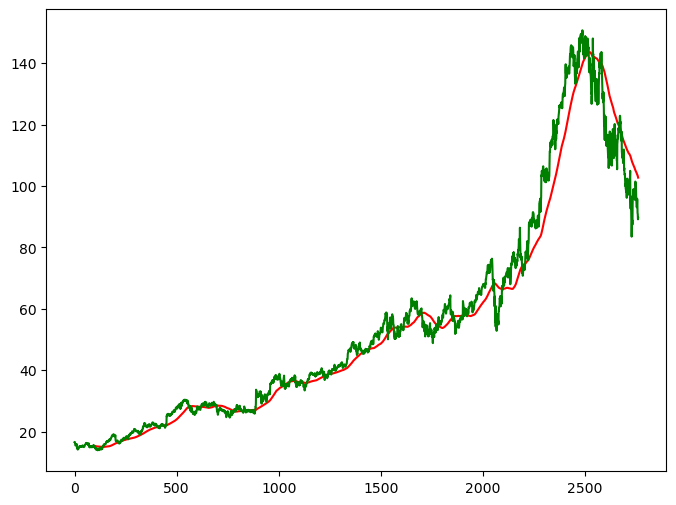

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [8]:
ma_200_days = data.Close.rolling(200).mean()

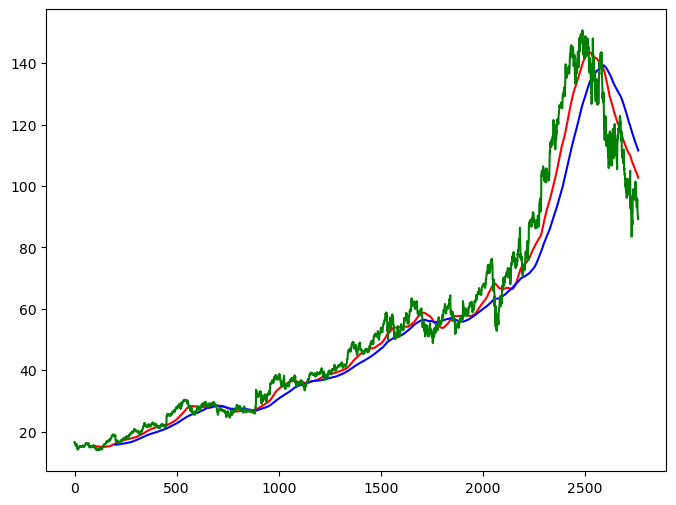

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [10]:
data.dropna(inplace=True)

In [11]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [12]:
data_train.shape[0]

2208

In [33]:
data_train.shape

(2208, 1)

In [13]:
data_test.shape[0]

553

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
data_train_scale = scaler.fit_transform(data_train)

In [16]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [17]:
x, y = np.array(x), np.array(y)

In [40]:
x_shape = x.shape
y_shape = y.shape

print("Shape of x:", x_shape)
print("Shape of y:", y_shape)

Shape of x: (553, 100, 1)
Shape of y: (553,)


In [18]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [19]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [20]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [21]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50

66/66 [==============================] - 11s 115ms/step - loss: 0.0383
Epoch 2/50
66/66 [==============================] - 9s 133ms/step - loss: 0.0080
Epoch 3/50
66/66 [==============================] - 11s 170ms/step - loss: 0.0064
Epoch 4/50
66/66 [==============================] - 10s 157ms/step - loss: 0.0056
Epoch 5/50
66/66 [==============================] - 10s 156ms/step - loss: 0.0060
Epoch 6/50
66/66 [==============================] - 11s 162ms/step - loss: 0.0049
Epoch 7/50
66/66 [==============================] - 11s 166ms/step - loss: 0.0048
Epoch 8/50
66/66 [==============================] - 23s 349ms/step - loss: 0.0043
Epoch 9/50
66/66 [==============================] - 26s 399ms/step - loss: 0.0052
Epoch 10/50
66/66 [==============================] - 24s 355ms/step - loss: 0.0041
Epoch 11/50
66/66 [==============================] - 25s 382ms/step - loss: 0.0043
Epoch 12/50
66/66 [==============================] - 29s 442ms/step - loss: 0.0041
Epoch 13/50
6

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [23]:
pas_100_days = data_train.tail(100)

In [24]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [25]:
data_test_scale  =  scaler.fit_transform(data_test)

In [26]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [27]:
y_predict = model.predict(x)

18/18 [==============================] - 1s 38ms/step


In [28]:
scale =1/scaler.scale_

In [29]:
y_predict = y_predict*scale

In [30]:
y = y*scale

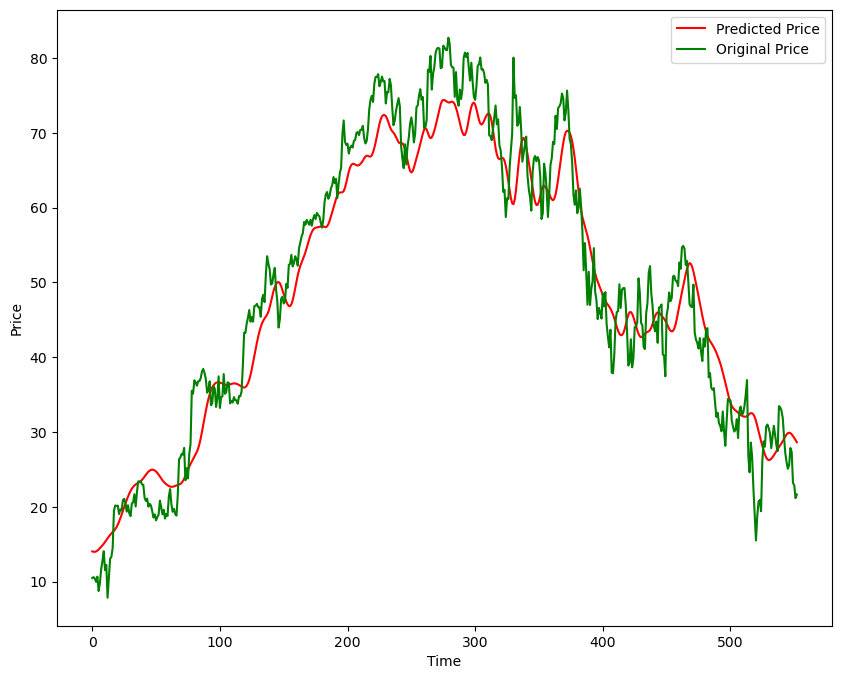

In [31]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [32]:
model.save('Stock Predictions Model.keras')